In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
billets = pd.read_csv('../Source/billets_complet.csv', delimiter=';')

In [4]:
billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [5]:
billets['is_genuine'] = billets['is_genuine'].map({True: 'Vrai', False: 'Faux'})


In [6]:
dimensions = ['length', 'height_left', 'height_right', 'margin_up', 'margin_low', 'diagonal']


/var/folders/v2/_0pssf4s1yq9qc7hcc34x81c0000gn/T/ipykernel_18858/1667854133.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_genuine', data=billets, palette='pastel', stat='count')


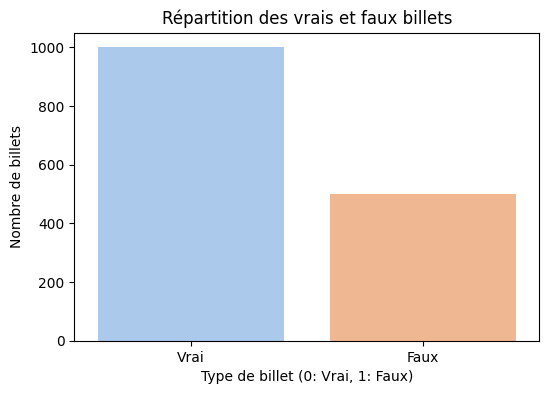

In [7]:
# Visualisation de la répartition des vrais/faux billets
plt.figure(figsize=(6, 4))
sns.countplot(x='is_genuine', data=billets, palette='pastel', stat='count')
plt.title('Répartition des vrais et faux billets')
plt.xlabel('Type de billet (0: Vrai, 1: Faux)')
plt.ylabel('Nombre de billets')
plt.show()

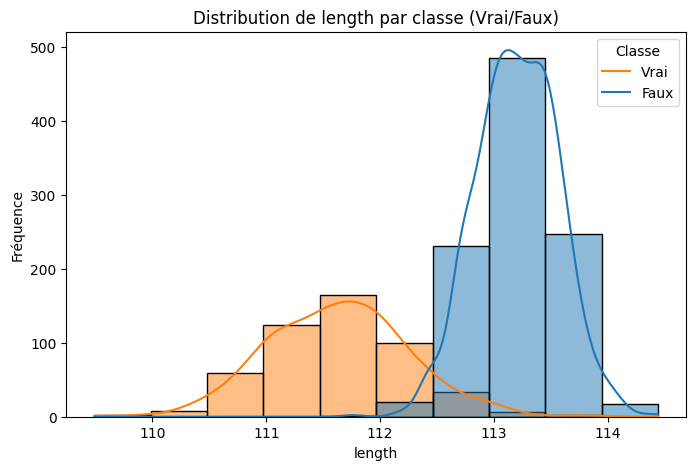

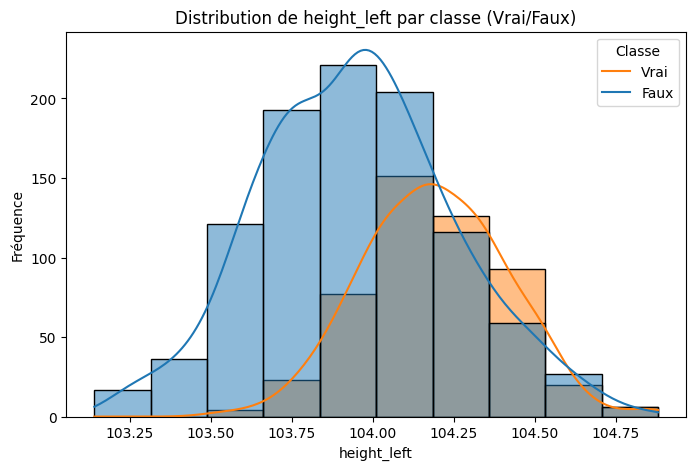

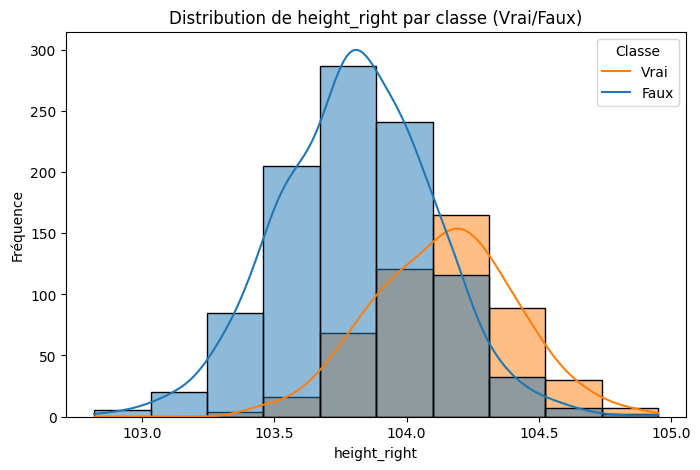

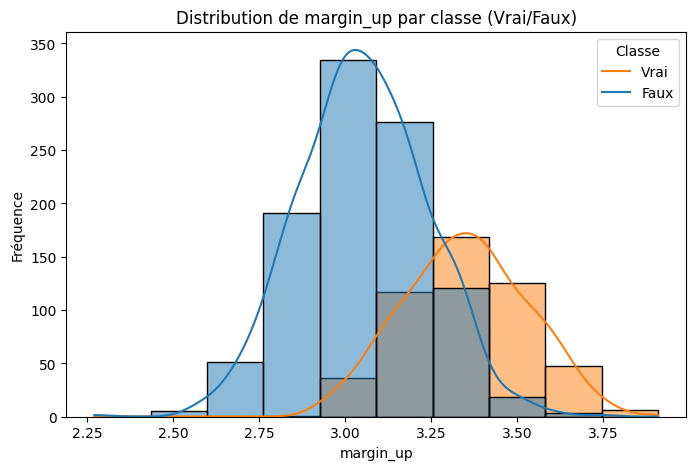

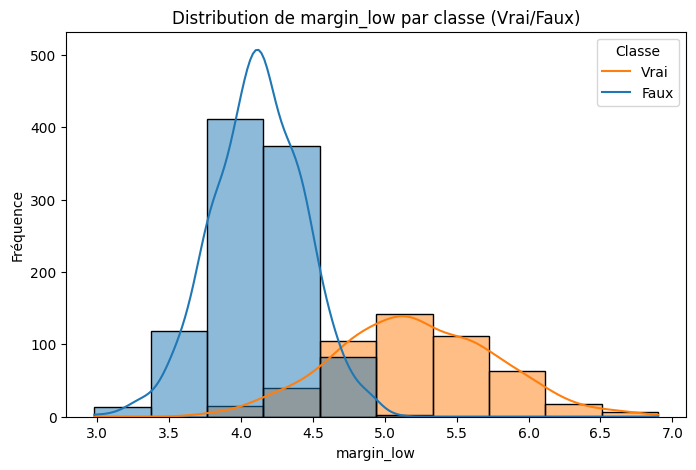

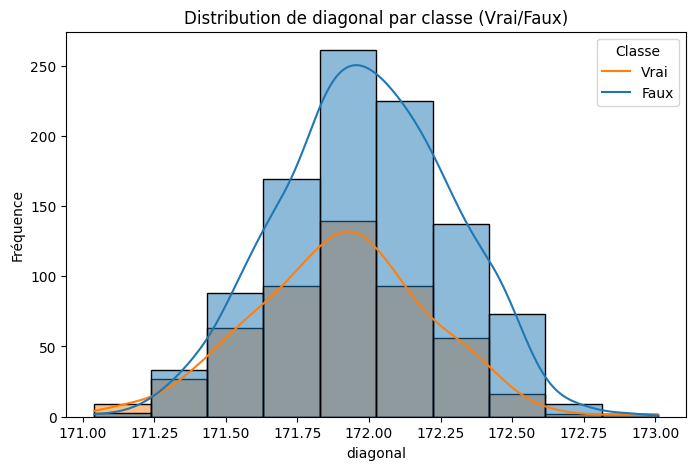

In [10]:
# Visualisation des distributions par classe
for dim in dimensions:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=billets, x=dim, hue='is_genuine', kde=True, bins=10)
    plt.title(f"Distribution de {dim} par classe (Vrai/Faux)")
    plt.xlabel(dim)
    plt.ylabel("Fréquence")
    plt.legend(title="Classe", labels=["Vrai", "Faux"])
    plt.show()


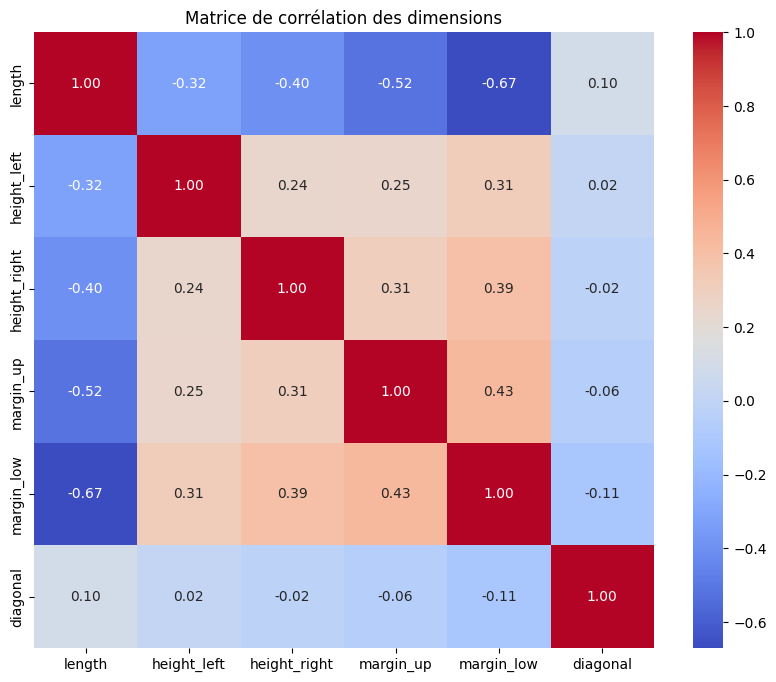

In [11]:
# Matrice de corrélation entre les dimensions
correlation_matrix = billets[dimensions].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de corrélation des dimensions")
plt.show()

In [12]:
# Statistiques descriptives générales
print("\nStatistiques descriptives :")
print(billets.describe())


Statistiques descriptives :
          diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1500.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.483475     3.151473   
std       0.305195     0.299462      0.325627     0.659632     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.020000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000  


In [13]:
# Répartition des vrais/faux billets
print("\nRépartition des vrais/faux billets :")
print(billets['is_genuine'].value_counts())
print(billets['is_genuine'].value_counts(normalize=True) * 100)  # Pourcentage


Répartition des vrais/faux billets :
is_genuine
Vrai    1000
Faux     500
Name: count, dtype: int64
is_genuine
Vrai    66.666667
Faux    33.333333
Name: proportion, dtype: float64


In [14]:
# Détection des valeurs manquantes
print("\nValeurs manquantes :")
print(billets.isnull().sum())


Valeurs manquantes :
is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64
